In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [3]:
# from stata2python import stata2python

In [4]:
# stata2python("corr points assists rebounds", "nba")

In [5]:
df = pd.read_stata('soccer_data.dta')
df.head()

,player_id,player_name,war_before,war_after,year,team,nationality,position,age,league,...,oecd,weekly_wage,contract,asia,lac,income,ln_wage,ln_contract,num_country,ln_income
0,2726,Nelson de Jesus Dida,0.0,0.0,2004/05 Statistics,AC Milan,Brazil,G,31,UEFA Champions League,...,0,23000.0,14000000.0,0,1,8800.0,10.043249,16.454567,302,9.082507
1,2726,Nelson de Jesus Dida,0.0,0.0,2004/05 Statistics,AC Milan,Brazil,G,31,Italian Serie A,...,0,23000.0,14000000.0,0,1,8800.0,10.043249,16.454567,302,9.082507
2,2741,Juliano Belletti,0.0,0.0,2004/05 Statistics,Barcelona,Brazil,D,28,Spanish Primera DivisiÛn,...,0,48000.0,8600000.0,0,1,8800.0,10.778956,15.967273,302,9.082507
3,2741,Juliano Belletti,0.0,0.0,2004/05 Statistics,Barcelona,Brazil,D,28,UEFA Champions League,...,0,48000.0,8600000.0,0,1,8800.0,10.778956,15.967273,302,9.082507
4,2749,Cris,0.0,0.0,2004/05 Statistics,Lyon,Brazil,D,27,French Ligue 1,...,0,38000.0,4600000.0,0,1,8800.0,10.545341,15.341567,302,9.082507


In [ ]:
df.describe()

# **TABLE 1**

In [ ]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_stata('soccer_data.dta')

x_region = ["africa", "asia", "lac", "east_europe"]

df.dropna(subset=['ln_contract'], inplace=True)

filter_condition = (
    (df['italian'] == 1) | (df['champions'] == 1) |
    (df['english'] == 1) | (df['french'] == 1) |
    (df['german'] == 1) | (df['spanish'] == 1)
) & (df['num_country'] >= 5)

filtered_df = df[filter_condition]

summary_stats = filtered_df[['yellow_card', 'red_card',
                             'civwar', 'r_law', 'income',
                             'age', 'weekly_wage', 'contract',
                             'games_start', 'games_sub',
                             'goalie', 'defender', 'forward', 'midfield',
                             'goals'] + x_region + ['oecd', 'english', 'champions', 'french', 'german', 'italian', 'spanish']].describe()

summary_stats.head()

,yellow_card,red_card,civwar,r_law,income,age,weekly_wage,contract,games_start,games_sub,...,asia,lac,east_europe,oecd,english,champions,french,german,italian,spanish
count,5035.000000,5035.000000,5035.000000,5035.000000,4965.000000,5035.000000,5034.000000,5.035000e+03,5035.000000,5035.000000,...,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000
mean,2.434161,0.157498,2.741609,0.849827,26203.863041,25.992850,23991.375646,6.323515e+06,13.800199,3.130487,...,0.003774,0.124926,0.068719,0.735253,0.176564,0.186495,0.153525,0.144985,0.173188,0.165243
std,2.734036,0.416225,4.742952,0.886973,10923.413993,4.404231,27014.382432,8.198478e+06,11.485606,3.897660,...,0.061320,0.330667,0.253001,0.441242,0.381337,0.389544,0.360529,0.352121,0.378447,0.371437
min,0.000000,0.000000,0.000000,-1.760000,720.000000,17.000000,0.000000,3.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.510000,21470.000000,23.000000,4400.000000,2.400000e+06,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# **TABLE 2**

In [ ]:
df = pd.read_stata('soccer_data.dta')

rename_dict = {
    'civwar': 'Years of civil war',
    'ln_income': 'Log GNI per capita',
    'r_law': 'Rule of Law',
    'age': 'Age',
    'ln_contract': 'Log transfer fee',
    'games_start': 'Games Started',
    'games_sub': 'Substitute',
    'defender': 'Defender',
    'forward': 'Forward',
    'midfield': 'Midfield',
    'goalie': 'Goalie',
    'goals': 'Goals',
    'champions': 'European Champions League',
    'french': 'French League',
    'german': 'German League',
    'italian': 'Italian League',
    'spanish': 'Spanish League',
    'english': 'English League',
    'war_after': 'Civil war years post-birth',
    'war_before': 'Civil war years pre-birth'
}

df.rename(columns=rename_dict, inplace=True)

In [ ]:
league_columns = ['Italian League', 'European Champions League', 'English League', 'French League', 'German League', 'Spanish League']
df['league_membership'] = df[league_columns].sum(axis=1) >= 1
filtered_df = df[(df['league_membership']) & (df['num_country'] >= 5)]

In [ ]:
formulas = {
    "column1": 'yellow_card ~ Q("Years of civil war") + Age + Q("Log transfer fee") + Q("Games Started") + Substitute + Defender + Forward + Midfield + '
           'Goals + Q("Italian League") + Q("European Champions League") + Q("French League") + Q("German League") + Q("Spanish League") + '
           'africa + asia + lac + east_europe',
    "column2": 'yellow_card ~ Q("Years of civil war") + Q("Log GNI per capita") + Age + Q("Games Started") + Substitute + Defender + Forward + Midfield + '
           'Goals + Q("Log transfer fee") + Q("Italian League") + Q("European Champions League") + Q("French League") + Q("German League") + Q("Spanish League") + '
           'africa + asia + lac + east_europe',
    "column3": 'yellow_card ~ Q("Years of civil war") +  Q("Rule of Law") + Age  + Q("Log transfer fee") + Q("Games Started") + Substitute + Defender + Forward + Midfield + '
           'Goals + Q("Italian League") + Q("European Champions League") + Q("French League") + Q("German League") + Q("Spanish League") + '
           'africa + asia + lac + east_europe',
     "column4": 'red_card ~ Q("Years of civil war") +  Q("Rule of Law") + Age + Q("Log transfer fee") + Q("Games Started") + Substitute + Defender + Forward + Midfield + '
           'Goals + Q("Italian League") + Q("European Champions League") + Q("French League") + Q("German League") + Q("Spanish League") + '
           'africa + asia + lac + east_europe',
    "column5": 'Goals ~ Q("Years of civil war") +  Q("Rule of Law") + Age + Q("Log transfer fee") + Q("Games Started") + Substitute + Forward + Midfield + '
           'Goalie + Q("Italian League") + Q("European Champions League") + Q("French League") + Q("German League") + Q("Spanish League") + '
           'africa + asia + lac + east_europe',
    "column6": 'yellow_card ~ Q("Civil war years pre-birth") +  Q("Civil war years post-birth") + Age + Q("Log transfer fee") + Q("Games Started") + Substitute + Defender + Forward + Midfield + '
           'Goals + Q("Italian League") + Q("European Champions League") + Q("French League") + Q("German League") + Q("Spanish League") + '
           'africa + asia + lac + east_europe',
    "column6": 'red_card ~ Q("Civil war years pre-birth") +  Q("Civil war years post-birth") + Age + Q("Log transfer fee") + Q("Games Started") + Substitute + Defender + Forward + Midfield + '
           'Goals + Q("Italian League") + Q("European Champions League") + Q("French League") + Q("German League") + Q("Spanish League") + '
           'africa + asia + lac + east_europe'
}


In [ ]:
models = {}
for column, formula in formulas.items():
    model = smf.ols(formula, data=filtered_df).fit(cov_type='cluster', cov_kwds={'groups': filtered_df['nation']})
    models[column] = model
    print('')
    print(f"Results for {column}:")
    print(model.summary())


Results for column1:
                            OLS Regression Results                            
Dep. Variable:            yellow_card   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     710.9
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           3.30e-69
Time:                        10:40:48   Log-Likelihood:                -10271.
No. Observations:                4963   AIC:                         2.058e+04
Df Residuals:                    4944   BIC:                         2.070e+04
Df Model:                          18                                         
Covariance Type:              cluster                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
wb_codes = pd.read_csv('Wb_codes.csv')
wb_codes.head()

,id,wb_code
0,1,ALB
1,2,DZA
2,3,AGO
3,4,ARG
4,5,ARM


In [ ]:
import pandas as pd

fig_1 = {
    'xf': ['Serie A TIM', 'Serie A TIM', 'Serie A TIM', 'Serie A TIM'],
    'cause': ['Assault', 'Unsportsmanlike Conduct', 'Other Non-Violent', 'Total'],
    '2005-2006': [1299, 207, 174, 1680],
    '2006-2007': [1357, 320, 235, 1912],
    '2007-2008': [1413, 281, 225, 1919],
    'Average': [1356.333333, 269.3333333, 211.3333333, 1837],
    'Percent': [73.83414999, 14.66158592, 11.5042642, 100]
}

fig_1_data = pd.DataFrame(fig_1)



In [ ]:
fig_2 = {
    'cause': ['Violent Foul', 'Unsporting Behavior', 'Non-Violent Offense', 'Grand Total'],
    '2004-2005': [446, 177, 56, 679],
    '2005-2006': [464, 193, 76, 733],
    'Sum': [910, 370, 132, 1412],
    'Percent': [64.44759207, 26.20396601, 9.348441926, 100]
}

fig_2_data = pd.DataFrame(fig_2)
fig_2_data

,cause,2004-2005,2005-2006,Sum,Percent
0,Violent Foul,446,464,910,64.447592
1,Unsporting Behavior,177,193,370,26.203966
2,Non-Violent Offense,56,76,132,9.348442
3,Grand Total,679,733,1412,100.000000


# **Figure 1A/1B**

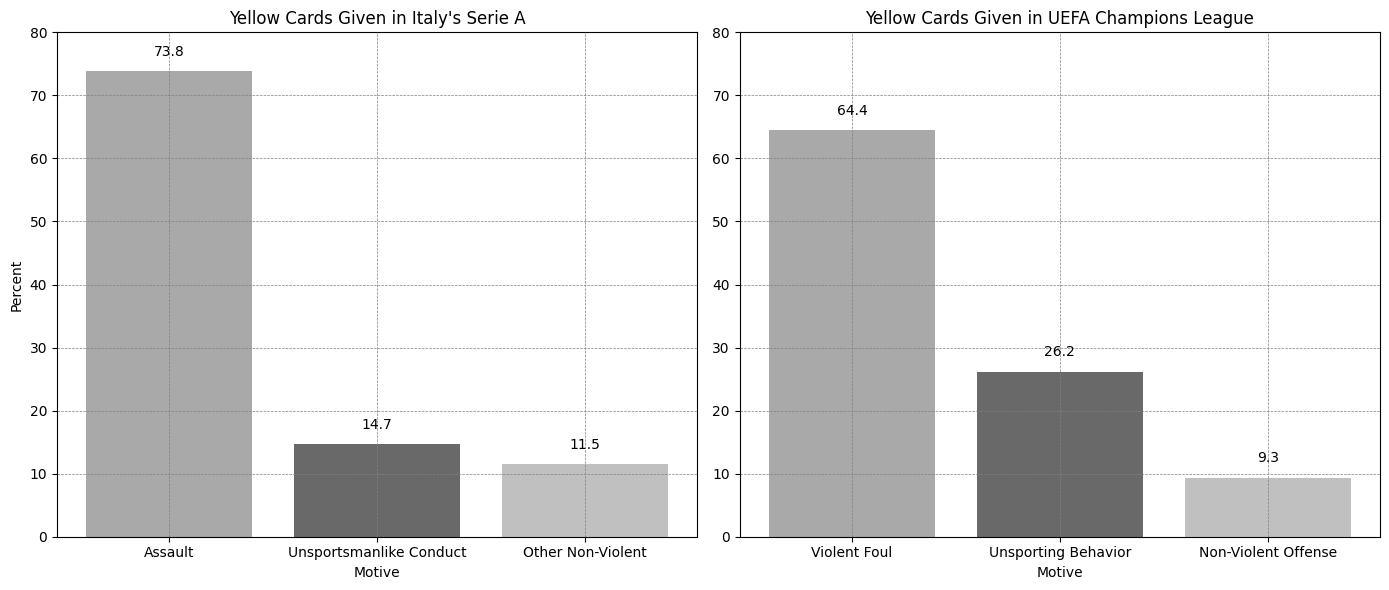

In [ ]:


categories_1 = fig_1_data['cause'][:-1]
percentages_1 = fig_1_data['Percent'][:-1]

categories_2 = fig_2_data['cause'][:-1]
percentages_2 = fig_2_data['Percent'][:-1]

colors = ['darkgrey', 'dimgray', 'silver']
patterns = ['', '', '']

fig, axes = plt.subplots(1, 2, figsize=(14, 6), tight_layout=True)

bars1 = axes[0].bar(categories_1, percentages_1, color=colors)

axes[0].set_title("Yellow Cards Given in Italy's Serie A")
axes[0].set_xlabel("Motive")
axes[0].set_ylabel("Percent")
axes[0].set_ylim(0, 80)
axes[0].grid(color='gray', linestyle='--', linewidth=0.5)

for bar in bars1:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 1),
                 ha='center', va='bottom')

bars2 = axes[1].bar(categories_2, percentages_2, color=colors)

axes[1].set_title("Yellow Cards Given in UEFA Champions League")
axes[1].set_xlabel("Motive")
axes[1].set_ylim(0, 80)
axes[1].grid(color='gray', linestyle='--', linewidth=0.5)

for bar in bars2:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 1),
                 ha='center', va='bottom')

plt.show()

---

Note: These are our initial attempts to replicate figure 2/3/4. Please see the next section for corrected visualizations.


# Figure 2



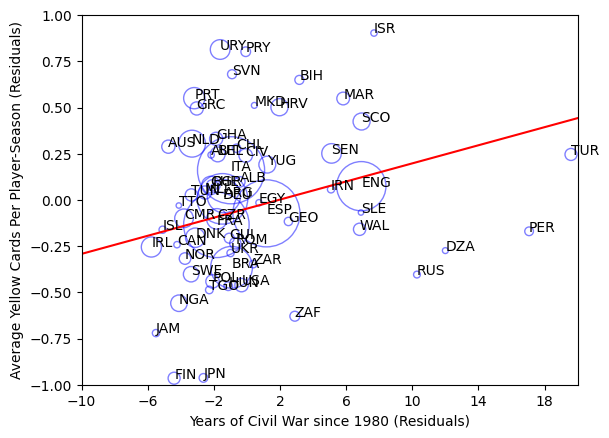

In [ ]:
fig_2_df = pd.read_stata('soccer_data.dta')

fig_2_df = df.dropna(subset=["contract"])

filter_vars = ['italian', 'champions', 'english', 'french', 'german', 'spanish']
fig_2_df = fig_2_df[fig_2_df[filter_vars].any(axis=1)]

fig_2_df = fig_2_df[fig_2_df["num_country"] >= 5]

wb_codes = pd.read_csv("Wb_codes.csv")
wb_codes = wb_codes.rename(columns={'id': 'nation'})
fig_2_df = fig_2_df.merge(wb_codes, on='nation')

indep_vars = ["age", "games_start", "games_sub", "defender", "goalie", "forward", "midfield",
              "goals", "ln_contract", "italian", "champions", "french", "german",
              "spanish", "africa", "asia", "lac", "east_europe"]
fig_2_X = sm.add_constant(fig_2_df[indep_vars])

yellow_card_y = fig_2_df["yellow_card"]
yellow_card_model = sm.OLS(yellow_card_y, fig_2_X).fit()
yellow_hat = yellow_card_model.predict(fig_2_X)
yellow_res = fig_2_df["yellow_card"] - yellow_hat
fig_2_df["yellow_res"] = yellow_res

civ_war_y = fig_2_df["civwar"]
civ_war_model = sm.OLS(civ_war_y, fig_2_X).fit()
war_hat = civ_war_model.predict(fig_2_X)
war_res = fig_2_df["civwar"] - war_hat
fig_2_df["war_res"] = war_res

fig_2_df = fig_2_df[["yellow_res", "war_res", "wb_code", "num_country"]].groupby("wb_code").mean().reset_index()
yellow_res = fig_2_df["yellow_res"]
war_res = fig_2_df["war_res"]
num_country = fig_2_df["num_country"]

plt.scatter(war_res, yellow_res, facecolors='none', edgecolors='b', alpha=0.5, s=num_country * 3)
plt.plot(np.unique(war_res), np.poly1d(np.polyfit(war_res, yellow_res, 1))(np.unique(war_res)), color='r')

plt.xlabel('Years of Civil War since 1980 (Residuals)')
plt.ylabel('Average Yellow Cards Per Player-Season (Residuals)')

plt.xlim(-10, 20)
plt.xticks(range(-10, 20, 4))
plt.ylim(-1, 1)

for i, wb in enumerate(fig_2_df["wb_code"]):
  plt.annotate(wb, (war_res[i], yellow_res[i]))

plt.show()

# Figure 3

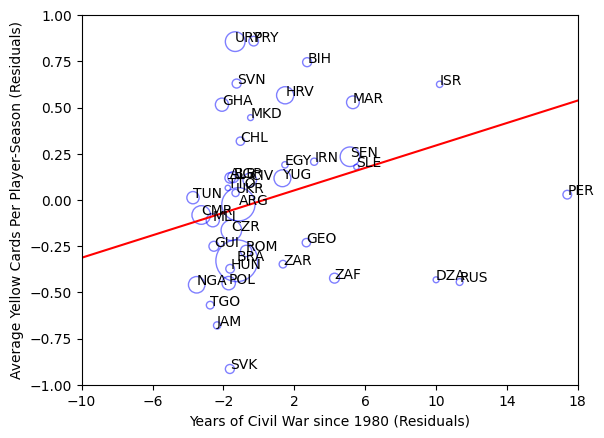

In [ ]:
fig_3_df = pd.read_stata('soccer_data.dta')

fig_3_df = df.dropna(subset=["contract"])

filter_vars = ['italian', 'champions', 'english', 'french', 'german', 'spanish']
fig_3_df = fig_3_df[fig_3_df[filter_vars].any(axis=1)]

fig_3_df = fig_3_df[fig_3_df["oecd"] == 0]

fig_3_df = fig_3_df[fig_3_df["num_country"] >= 5]

wb_codes = pd.read_csv("Wb_codes.csv")
wb_codes = wb_codes.rename(columns={'id': 'nation'})
fig_3_df = fig_3_df.merge(wb_codes, on='nation')

indep_vars = ["age", "games_start", "games_sub", "defender", "forward", "midfield",
              "goals", "ln_contract", "italian", "champions", "french", "german",
              "spanish", "africa", "asia", "lac", "east_europe"]
fig_3_X = sm.add_constant(fig_3_df[indep_vars])

yellow_card_y = fig_3_df["yellow_card"]
yellow_card_model = sm.OLS(yellow_card_y, fig_3_X).fit()
yellow_hat = yellow_card_model.predict(fig_3_X)
yellow_res = fig_3_df["yellow_card"] - yellow_hat
fig_3_df["yellow_res"] = yellow_res

civ_war_y = fig_3_df["civwar"]
civ_war_model = sm.OLS(civ_war_y, fig_3_X).fit()
war_hat = civ_war_model.predict(fig_3_X)
war_res = fig_3_df["civwar"] - war_hat
fig_3_df["war_res"] = war_res

fig_3_df = fig_3_df[["yellow_res", "war_res", "wb_code", "num_country"]].groupby("wb_code").mean().reset_index()
yellow_res = fig_3_df["yellow_res"]
war_res = fig_3_df["war_res"]
num_country = fig_3_df["num_country"]

plt.scatter(war_res, yellow_res, facecolors='none', edgecolors='b', alpha=0.5, s=num_country * 3)
plt.plot(np.unique(war_res), np.poly1d(np.polyfit(war_res, yellow_res, 1))(np.unique(war_res)), color='r')

plt.xlabel('Years of Civil War since 1980 (Residuals)')
plt.ylabel('Average Yellow Cards Per Player-Season (Residuals)')

plt.xlim(-10, 18)
plt.xticks(range(-10, 20, 4))
plt.ylim(-1, 1)

for i, wb in enumerate(fig_3_df["wb_code"]):
  plt.annotate(wb, (war_res[i], yellow_res[i]))

plt.show()

# Figure 4 - Aneesh

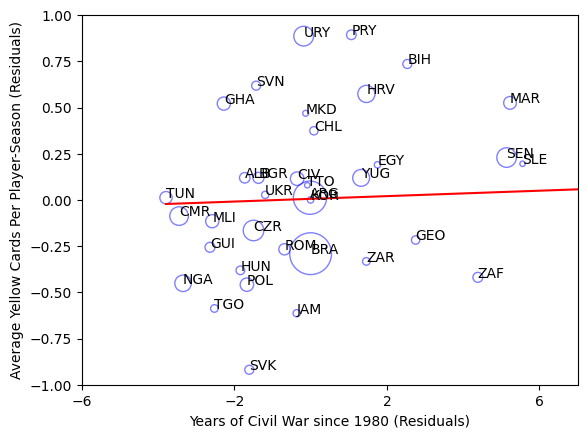

In [ ]:
fig_4_df = pd.read_stata('soccer_data.dta')

fig_4_df = df.dropna(subset=["contract"])

filter_vars = ['italian', 'champions', 'english', 'french', 'german', 'spanish']
fig_4_df = fig_4_df[fig_4_df[filter_vars].any(axis=1)]

fig_4_df = fig_4_df[fig_4_df["oecd"] == 0]

fig_4_df = fig_4_df[~fig_4_df["nation"].isin([23, 52, 54, 78, 101])]

fig_4_df = fig_4_df[fig_4_df["num_country"] >= 5]

wb_codes = pd.read_csv("Wb_codes.csv")
wb_codes = wb_codes.rename(columns={'id': 'nation'})
fig_4_df = fig_4_df.merge(wb_codes, on='nation')

indep_vars = ["age", "games_start", "games_sub", "defender", "forward", "midfield",
              "goals", "ln_contract", "italian", "champions", "french", "german",
              "spanish", "africa", "asia", "lac", "east_europe"]
fig_4_X = sm.add_constant(fig_4_df[indep_vars])

yellow_card_y = fig_4_df["yellow_card"]
yellow_card_model = sm.OLS(yellow_card_y, fig_4_X).fit()
yellow_hat = yellow_card_model.predict(fig_4_X)
yellow_res = fig_4_df["yellow_card"] - yellow_hat
fig_4_df["yellow_res"] = yellow_res

civ_war_y = fig_4_df["civwar"]
civ_war_model = sm.OLS(civ_war_y, fig_4_X).fit()
war_hat = civ_war_model.predict(fig_4_X)
war_res = fig_4_df["civwar"] - war_hat
fig_4_df["war_res"] = war_res

fig_4_df = fig_4_df[["yellow_res", "war_res", "wb_code", "num_country"]].groupby("wb_code").mean().reset_index()
yellow_res = fig_4_df["yellow_res"]
war_res = fig_4_df["war_res"]
num_country = fig_4_df["num_country"]

plt.scatter(war_res, yellow_res, facecolors='none', edgecolors='b', alpha=0.5, s=num_country * 3)
plt.plot(np.unique(war_res), np.poly1d(np.polyfit(war_res, yellow_res, 1))(np.unique(war_res)), color='r')

plt.xlabel('Years of Civil War since 1980 (Residuals)')
plt.ylabel('Average Yellow Cards Per Player-Season (Residuals)')

plt.xlim(-6, 7)
plt.xticks(range(-6, 8, 4))
plt.ylim(-1, 1)

for i, wb in enumerate(fig_4_df["wb_code"]):
  plt.annotate(wb, (war_res[i], yellow_res[i]))

plt.show()

---
Figures below are all corrected!

# Revised Figure 2

In [ ]:
fig_2_df = pd.read_stata('soccer_data.dta')
fig_2_df.drop('num_country', axis=1, inplace=True)
fig_2_df = df.dropna(subset=["contract"])
conditions = (fig_2_df['italian'] == 1) | (fig_2_df['champions'] == 1) | (fig_2_df['english'] == 1) | (fig_2_df['french'] == 1) | (fig_2_df['german'] == 1) | (fig_2_df['spanish'] == 1)
fig_2_df['num_country'] = fig_2_df[conditions].groupby('nationality')['player_id'].transform('count')

wb_codes = pd.read_csv("Wb_codes.csv")
wb_codes = wb_codes.rename(columns={'id': 'nation'})

fig_2_df = fig_2_df.merge(wb_codes, on='nation')
fig_2_df

<ipython-input-35-81314a86954e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_2_df['num_country'] = fig_2_df[conditions].groupby('nationality')['player_id'].transform('count')


,player_id,player_name,war_before,war_after,year,team,nationality,position,age,league,...,weekly_wage,contract,asia,lac,income,ln_wage,ln_contract,num_country,ln_income,wb_code
0,2726,Nelson de Jesus Dida,0.0,0.0,2004/05 Statistics,AC Milan,Brazil,G,31,UEFA Champions League,...,23000.0,14000000.0,0,1,8800.0,10.043249,16.454567,277,9.082507,BRA
1,2726,Nelson de Jesus Dida,0.0,0.0,2004/05 Statistics,AC Milan,Brazil,G,31,Italian Serie A,...,23000.0,14000000.0,0,1,8800.0,10.043249,16.454567,277,9.082507,BRA
2,2741,Juliano Belletti,0.0,0.0,2004/05 Statistics,Barcelona,Brazil,D,28,Spanish Primera DivisiÛn,...,48000.0,8600000.0,0,1,8800.0,10.778956,15.967273,277,9.082507,BRA
3,2741,Juliano Belletti,0.0,0.0,2004/05 Statistics,Barcelona,Brazil,D,28,UEFA Champions League,...,48000.0,8600000.0,0,1,8800.0,10.778956,15.967273,277,9.082507,BRA
4,2749,Cris,0.0,0.0,2004/05 Statistics,Lyon,Brazil,D,27,French Ligue 1,...,38000.0,4600000.0,0,1,8800.0,10.545341,15.341567,277,9.082507,BRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5073,68202,moumouni odagano,0.0,1.0,2005/06 Statistics,Sochaux,Burkina Faso,F,23,French Ligue 1,...,18000.0,5500000.0,0,0,1330.0,9.798127,15.520259,2,7.192934,BFA
5074,12061,Juan Manuel Peña,3.0,0.0,2005/06 Statistics,Villarreal,Bolivia,D,33,Spanish Primera DivisiÛn,...,10500.0,2300000.0,0,1,2890.0,9.259130,14.648419,2,7.969012,BOL
5075,12061,Juan Manuel Peña,3.0,0.0,2005/06 Statistics,Villarreal,Bolivia,D,33,UEFA Champions League,...,10500.0,2300000.0,0,1,2890.0,9.259130,14.648419,2,7.969012,BOL
5076,27273,Chiguy Lucau,8.0,7.0,2005/06 Statistics,Le Mans,Democratic Republic of Congo,S,21,French Ligue 1,...,1900.0,2500000.0,0,0,720.0,7.549609,14.731801,1,6.579251,ZAR


In [ ]:
conditions = (
    (fig_2_df['italian'] == 1) |
    (fig_2_df['champions'] == 1) |
    (fig_2_df['english'] == 1) |
    (fig_2_df['french'] == 1) |
    (fig_2_df['german'] == 1) |
    (fig_2_df['spanish'] == 1)
) & (fig_2_df['num_country'] >= 5)

filtered_df = fig_2_df[conditions]


aggregated_df = filtered_df.groupby('wb_code').agg({
    'yellow_card': 'mean',
    'civwar': 'mean',
    'nation': 'mean',
    'num_country': 'count',
    'age': 'mean',
    'games_start': 'mean',
    'games_sub': 'mean',
    'goalie': 'mean',
    'defender': 'mean',
    'forward': 'mean',
    'midfield': 'mean',
    'goals': 'mean',
    'ln_contract': 'mean',
    'italian': 'mean',
    'champions': 'mean',
    'english': 'mean',
    'french': 'mean',
    'german': 'mean',
    'spanish': 'mean',
    'africa': 'mean',
    'asia': 'mean',
    'lac': 'mean',
    'east_europe': 'mean',
    'oecd': 'mean'
}).reset_index()

fig_2_df = aggregated_df

In [ ]:
X = fig_2_df[['age', 'games_start', 'games_sub', 'defender', 'forward', 'midfield', 'goals', 'ln_contract', 'italian', 'champions', 'french', 'german', 'spanish', 'africa', 'asia', 'lac', 'east_europe']]
X = sm.add_constant(X)

y = fig_2_df['yellow_card']

model_yellow = sm.OLS(y, X).fit()

# print(model_yellow.summary())

fig_2_df['yellowhat'] = model_yellow.predict(X)

fig_2_df['yellow_res'] = fig_2_df['yellow_card'] - fig_2_df['yellowhat']

In [ ]:
model_civwar = sm.OLS(fig_2_df['civwar'], X).fit()

# Display the regression results
# print(model_civwar.summary())

# Predict values for civwar
fig_2_df['warhat'] = model_civwar.predict(X)

fig_2_df['war_res'] = fig_2_df['civwar'] - fig_2_df['warhat']

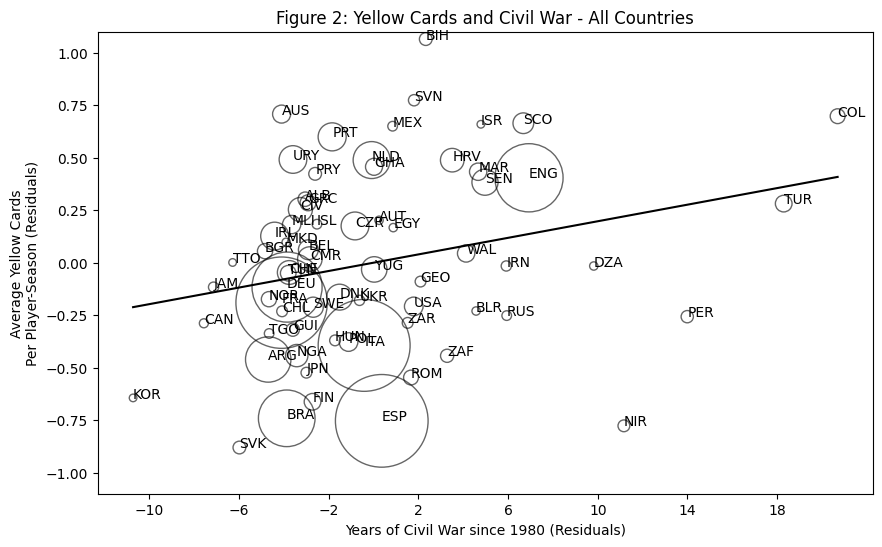

In [ ]:
x = fig_2_df['yellow_res']
y = fig_2_df['war_res']


# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of residuals
scatter = ax.scatter(x=y, y=x, s=fig_2_df['num_country']*6, facecolors='none', edgecolors='black', alpha=0.6, label='Residuals')



for i, wb in enumerate(fig_2_df["wb_code"]):
  plt.annotate(wb, (fig_2_df['war_res'][i], fig_2_df['yellow_res'][i]))


# Setting labels and titles
plt.plot(np.unique(fig_2_df['war_res']), np.poly1d(np.polyfit(fig_2_df['war_res'], fig_2_df['yellow_res'], 1))(np.unique(fig_2_df['war_res'])), color='black')

plt.ylim(-1.1, 1.1)
plt.xticks(range(-10, 19, 4))

ax.set_ylabel('Average Yellow Cards\nPer Player-Season (Residuals)')
ax.set_xlabel('Years of Civil War since 1980 (Residuals)')
ax.set_title('Figure 2: Yellow Cards and Civil War - All Countries')

plt.show()


# Revised Figure 3

In [ ]:
fig_3_df = pd.read_stata('soccer_data.dta')
fig_3_df.drop('num_country', axis=1, inplace=True)
fig_3_df = df.dropna(subset=["contract"])
conditions = ((fig_3_df['italian'] == 1) | (fig_3_df['champions'] == 1) | (fig_3_df['english'] == 1) | (fig_3_df['french'] == 1) | (fig_3_df['german'] == 1) | (fig_3_df['spanish'] == 1)) & (fig_3_df['oecd'] == 0)
fig_3_df['num_country'] = fig_3_df[conditions].groupby('nationality')['player_id'].transform('count')

wb_codes = pd.read_csv("Wb_codes.csv")
wb_codes = wb_codes.rename(columns={'id': 'nation'})

fig_3_df = fig_3_df.merge(wb_codes, on='nation')

In [ ]:
conditions = (
    (fig_3_df['italian'] == 1) |
    (fig_3_df['champions'] == 1) |
    (fig_3_df['english'] == 1) |
    (fig_3_df['french'] == 1) |
    (fig_3_df['german'] == 1) |
    (fig_3_df['spanish'] == 1)
) & (fig_3_df['num_country'] >= 5) & (fig_3_df['oecd'] == 0)

filtered_df = fig_3_df[conditions]


aggregated_df = filtered_df.groupby('wb_code').agg({
    'yellow_card': 'mean',
    'civwar': 'mean',
    'nation': 'mean',
    'num_country': 'count',
    'age': 'mean',
    'games_start': 'mean',
    'games_sub': 'mean',
    'goalie': 'mean',
    'defender': 'mean',
    'forward': 'mean',
    'midfield': 'mean',
    'goals': 'mean',
    'ln_contract': 'mean',
    'italian': 'mean',
    'champions': 'mean',
    'english': 'mean',
    'french': 'mean',
    'german': 'mean',
    'spanish': 'mean',
    'africa': 'mean',
    'asia': 'mean',
    'lac': 'mean',
    'east_europe': 'mean',
    'oecd': 'mean'
}).reset_index()

fig_3_df = aggregated_df

In [ ]:
# Set up regressions
X = fig_3_df[['age', 'games_start', 'games_sub', 'defender', 'forward', 'midfield', 'goals', 'ln_contract', 'italian', 'champions', 'french', 'german', 'spanish', 'africa', 'asia', 'lac', 'east_europe']]
X = sm.add_constant(X)

# Run regession on yellow cards
model_yellow = sm.OLS(fig_3_df['yellow_card'], X).fit()
fig_3_df['yellowhat'] = model_yellow.predict(X)
fig_3_df['yellow_res'] = fig_3_df['yellow_card'] - fig_3_df['yellowhat']

# Run regression on civil war
model_civwar = sm.OLS(fig_3_df['civwar'], X).fit()
fig_3_df['warhat'] = model_civwar.predict(X)
fig_3_df['war_res'] = fig_3_df['civwar'] - fig_3_df['warhat']

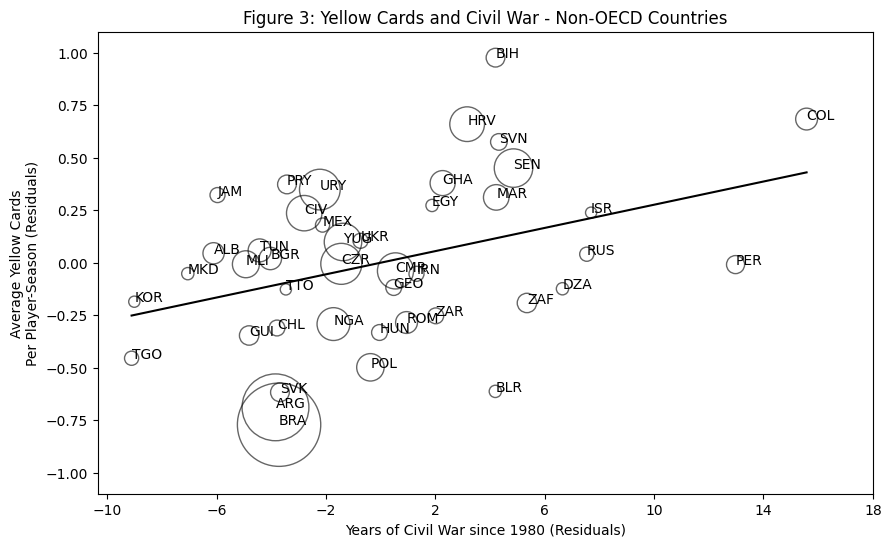

In [ ]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of residuals
scatter = ax.scatter(x=fig_3_df['war_res'], y=fig_3_df['yellow_res'], s=fig_3_df['num_country']*13, facecolors='none', edgecolors='black', alpha=0.6, label='Residuals')


for i, wb in enumerate(fig_3_df["wb_code"]):
  plt.annotate(wb, (fig_3_df['war_res'][i], fig_3_df['yellow_res'][i]))


# Setting labels and titles
plt.plot(np.unique(fig_3_df['war_res']), np.poly1d(np.polyfit(fig_3_df['war_res'], fig_3_df['yellow_res'], 1))(np.unique(fig_3_df['war_res'])), color='black')

plt.ylim(-1.1, 1.1)
plt.xticks(range(-10, 19, 4))

ax.set_ylabel('Average Yellow Cards\nPer Player-Season (Residuals)')
ax.set_xlabel('Years of Civil War since 1980 (Residuals)')
ax.set_title('Figure 3: Yellow Cards and Civil War - Non-OECD Countries')

plt.show()


# Revised Figure 4

In [ ]:
fig_4_df = pd.read_stata('soccer_data.dta')
fig_4_df.drop('num_country', axis=1, inplace=True)
fig_4_df = df.dropna(subset=["contract"])
conditions = ((fig_4_df['italian'] == 1) | (fig_4_df['champions'] == 1) | (fig_4_df['english'] == 1) | (fig_4_df['french'] == 1) | (fig_4_df['german'] == 1) | (fig_4_df['spanish'] == 1)) & (fig_4_df['oecd'] == 0) & (~fig_4_df['nation'].isin([23, 52, 54, 78, 101]))
fig_4_df['num_country'] = fig_4_df[conditions].groupby('nationality')['player_id'].transform('count')

wb_codes = pd.read_csv("Wb_codes.csv")
wb_codes = wb_codes.rename(columns={'id': 'nation'})

fig_4_df = fig_4_df.merge(wb_codes, on='nation')

In [ ]:
conditions = (
    (fig_4_df['italian'] == 1) |
    (fig_4_df['champions'] == 1) |
    (fig_4_df['english'] == 1) |
    (fig_4_df['french'] == 1) |
    (fig_4_df['german'] == 1) |
    (fig_4_df['spanish'] == 1)
) & (fig_4_df['num_country'] >= 5) & (fig_4_df['oecd'] == 0) & (~fig_4_df['nation'].isin([23, 52, 54, 78, 101]))

filtered_df = fig_4_df[conditions]


aggregated_df = filtered_df.groupby('wb_code').agg({
    'yellow_card': 'mean',
    'civwar': 'mean',
    'nation': 'mean',
    'num_country': 'count',
    'age': 'mean',
    'games_start': 'mean',
    'games_sub': 'mean',
    'goalie': 'mean',
    'defender': 'mean',
    'forward': 'mean',
    'midfield': 'mean',
    'goals': 'mean',
    'ln_contract': 'mean',
    'italian': 'mean',
    'champions': 'mean',
    'english': 'mean',
    'french': 'mean',
    'german': 'mean',
    'spanish': 'mean',
    'africa': 'mean',
    'asia': 'mean',
    'lac': 'mean',
    'east_europe': 'mean',
    'oecd': 'mean'
}).reset_index()

fig_4_df = aggregated_df

In [ ]:
X = fig_4_df[['age', 'games_start', 'games_sub', 'defender', 'forward', 'midfield', 'goals', 'ln_contract', 'italian', 'champions', 'french', 'german', 'spanish', 'africa', 'asia', 'lac', 'east_europe']]
X = sm.add_constant(X)

model_yellow = sm.OLS(fig_4_df['yellow_card'], X).fit()
fig_4_df['yellowhat'] = model_yellow.predict(X)
fig_4_df['yellow_res'] = fig_4_df['yellow_card'] - fig_4_df['yellowhat']

model_civwar = sm.OLS(fig_4_df['civwar'], X).fit()
fig_4_df['warhat'] = model_civwar.predict(X)
fig_4_df['war_res'] = fig_4_df['civwar'] - fig_4_df['warhat']

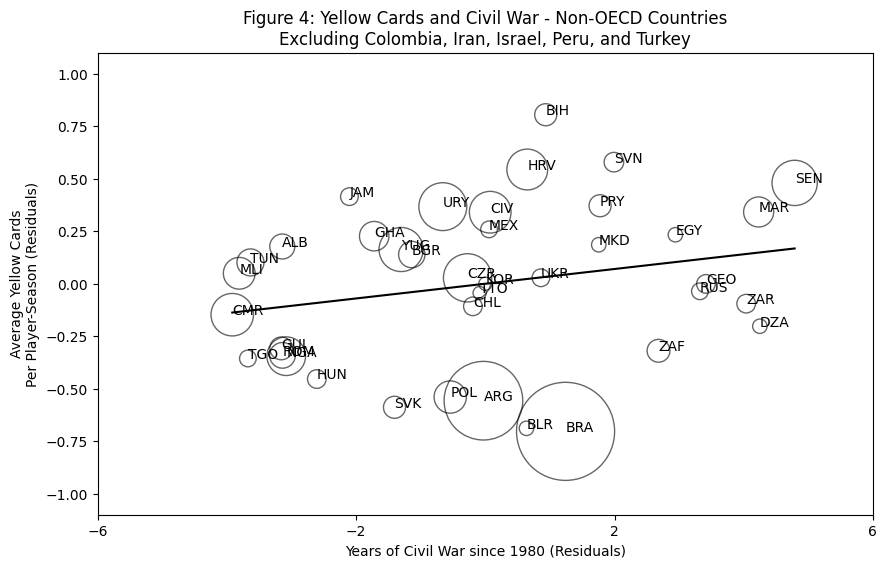

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(x=fig_4_df['war_res'], y=fig_4_df['yellow_res'], s=fig_4_df['num_country']*18, facecolors='none', edgecolors='black', alpha=0.6, label='Residuals')


for i, wb in enumerate(fig_4_df["wb_code"]):
  plt.annotate(wb, (fig_4_df['war_res'][i], fig_4_df['yellow_res'][i]))


plt.plot(np.unique(fig_4_df['war_res']), np.poly1d(np.polyfit(fig_4_df['war_res'], fig_4_df['yellow_res'], 1))(np.unique(fig_4_df['war_res'])), color='black')

plt.ylim(-1.1, 1.1)
plt.xticks(range(-6, 7, 4))

ax.set_ylabel('Average Yellow Cards\nPer Player-Season (Residuals)')
ax.set_xlabel('Years of Civil War since 1980 (Residuals)')
ax.set_title('Figure 4: Yellow Cards and Civil War - Non-OECD Countries\nExcluding Colombia, Iran, Israel, Peru, and Turkey')

plt.show()

---

# Appendix

## TABLE1

In [ ]:
filtered_df.columns

Index(['player_id', 'player_name', 'war_before', 'war_after', 'year', 'team',
       'nationality', 'position', 'age', 'league', 'games_start', 'games_sub',
       'goals', 'yellow_card', 'red_card', 'nation', 'defender', 'forward',
       'goalie', 'midfield', 'italian', 'champions', 'english', 'french',
       'german', 'spanish', 'r_law', 'civwar', 'africa', 'east_europe', 'oecd',
       'weekly_wage', 'contract', 'asia', 'lac', 'income', 'ln_wage',
       'ln_contract', 'num_country', 'ln_income'],
      dtype='object')

In [ ]:

df = pd.read_stata('soccer_data.dta')

x_region = ["africa", "asia", "lac", "east_europe"]

df.dropna(subset=['ln_contract'], inplace=True)

filter_condition = (
    (df['italian'] == 1) | (df['champions'] == 1) |
    (df['english'] == 1) | (df['french'] == 1) |
    (df['german'] == 1) | (df['spanish'] == 1)
) & (df['num_country'] >= 5)

filtered_df = df[filter_condition]

aggregated_df = filtered_df.groupby('nationality').agg({
    'player_id': 'count',  # This assumes player_id can represent a player-season
    'yellow_card': 'mean',  # Calculate the average yellow cards
    'civwar': lambda x: (x >= 1980).sum(),  # Sum civil war years since 1980
}).rename(columns={
    'player_id': 'Observations',
    'yellow_card': 'Yellow cards',
    'civwar': 'Civil war years'
})

aggregated_df = aggregated_df[aggregated_df['Observations'] >= 5]

aggregated_df.reset_index(inplace=True)

aggregated_df.sort_values(by='nationality', inplace=True)

aggregated_df

,nationality,Observations,Yellow cards,Civil war years
0,Albania,18,2.888889,0
1,Algeria,6,1.500000,0
2,Argentina,178,2.915730,0
3,Australia,28,2.571429,0
4,Austria,6,1.666667,0
...,...,...,...,...
65,Turkey,24,2.250000,0
66,Ukraine,9,1.444444,0
67,United States,30,0.966667,0
68,Uruguay,66,2.893939,0


# TABLE 2

In [6]:
df = pd.read_stata('soccer_data.dta')

rename_dict = {
    'civwar': 'Years of civil war',
    'ln_income': 'Log GNI per capita',
    'r_law': 'Rule of Law',
    'age': 'Age',
    'ln_contract': 'Log transfer fee',
    'games_start': 'Games Started',
    'games_sub': 'Substitute',
    'defender': 'Defender',
    'forward': 'Forward',
    'midfield': 'Midfield',
    'goalie': 'Goalie',
    'goals': 'Goals',
    'champions': 'European Champions League',
    'french': 'French League',
    'german': 'German League',
    'italian': 'Italian League',
    'spanish': 'Spanish League',
    'english': 'English League',
    'war_after': 'Civil war years post-birth',
    'war_before': 'Civil war years pre-birth'
}

df.rename(columns=rename_dict, inplace=True)



In [7]:
league_columns = ['Italian League', 'European Champions League', 'English League', 'French League', 'German League', 'Spanish League']
df['league_membership'] = df[league_columns].sum(axis=1) >= 1
filtered_df = df[(df['league_membership']) & (df['num_country'] >= 5)]

In [ ]:
# print(subset['Log Years of civil war'].isna().sum())  # Check for missing values in 'nation'


In [ ]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

try:
    subset.replace([np.inf, -np.inf], np.nan, inplace=True)  # Handle infs
    subset.dropna(inplace=True)  # Ensure no NaNs or infs
    model = smf.negativebinomial(formula, data=subset)
    fitted_model = model.fit(maxiter=100)
    print(fitted_model.summary())
except Exception as e:
    print(f"An error occurred: {e}")

Optimization terminated successfully.
         Current function value: 1.735109
         Iterations: 50
         Function evaluations: 55
         Gradient evaluations: 55
                     NegativeBinomial Regression Results                      
Dep. Variable:       Q("yellow_card")   No. Observations:                 1787
Model:               NegativeBinomial   Df Residuals:                     1773
Method:                           MLE   Df Model:                           13
Date:                Fri, 26 Apr 2024   Pseudo R-squ.:                  0.1749
Time:                        06:29:30   Log-Likelihood:                -3100.6
converged:                       True   LL-Null:                       -3758.1
Covariance Type:            nonrobust   LLR p-value:                3.379e-273
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept   

In [ ]:
filtered_df.columns

Index(['player_id', 'player_name', 'Civil war years pre-birth',
       'Civil war years post-birth', 'year', 'team', 'nationality', 'position',
       'Age', 'league', 'Games Started', 'Substitute', 'Goals', 'yellow_card',
       'red_card', 'nation', 'Defender', 'Forward', 'Goalie', 'Midfield',
       'Italian League', 'European Champions League', 'English League',
       'French League', 'German League', 'Spanish League', 'Rule of Law',
       'Years of civil war', 'africa', 'east_europe', 'oecd', 'weekly_wage',
       'contract', 'asia', 'lac', 'income', 'ln_wage', 'Log transfer fee',
       'num_country', 'Log GNI per capita'],
      dtype='object')

---

# Random

In [ ]:
df_Table1 = df.copy()

# Renaming columns to match the labels provided in Stata
df_Table1.rename(columns={
    'civwar': 'Years of civil war',
    'ln_income': 'Log GNI per capita',
    'r_law': 'Rule of Law',
    'age': 'Age',
    'ln_contract': 'Log transfer fee',
    'games_start': 'Games Started',
    'games_sub': 'Substitute',
    'defender': 'Defender',
    'forward': 'Forward',
    'midfield': 'Midfield',
    'goalie': 'Goalie',
    'goals': 'Goals',
    'champions': 'European Champions League',
    'french': 'French League',
    'german': 'German League',
    'italian': 'Italian League',
    'spanish': 'Spanish League',
    'english': 'English League',
    'war_after': 'Civil war years post-birth',
    'war_before': 'Civil war years pre-birth'
}, inplace=True)

# Dropping observations where 'Log transfer fee' is missing
df_Table1.dropna(subset=['Log transfer fee'], inplace=True)

# Define the condition for leagues and number of countries
condition = (
    df_Table1[['Italian League', 'European Champions League', 'English League', 'French League', 'German League', 'Spanish League']].any(axis=1) &
    (df_Table1['num_country'] >= 5)
)

# Selecting variables for analysis
variables = [
    'yellow_card', 'red_card', 'Years of civil war', 'Rule of Law', 'Log GNI per capita', 'Age',
    'weekly_wage', 'Log transfer fee', 'Games Started', 'Substitute', 'Goalie',
    'Defender', 'Forward', 'Midfield', 'Goals', 'africa', 'asia', 'lac',
    'east_europe', 'oecd', 'English League', 'European Champions League', 'French League', 'German League',
    'Italian League', 'Spanish League'
]

# Apply condition and select variables
filtered_data = df_Table1.loc[condition, variables]

# Compute statistics
stats = filtered_data.agg(['mean', 'std', 'min', 'max', 'count']).transpose()
stats.columns = ['Mean', 'Standard deviation', 'Minimum', 'Maximum', 'Observations']

# Prepare the DataFrame for LaTeX export
latex_code = stats.to_latex(
    header=True,
    index_names=False,
    column_format="lrrrrr",
    caption="Table 1: Descriptive Statistics",
    label="tab:descriptive_statistics",
    position="htbp",
    formatters={
        'Mean': '{:,.2f}'.format,
        'Standard deviation': '{:,.2f}'.format,
        'Minimum': '{:,.2f}'.format,
        'Maximum': '{:,.2f}'.format,
        'Observations': '{:,.0f}'.format
    }
)

print(latex_code)


\begin{table}[htbp]
\caption{Table 1: Descriptive Statistics}
\label{tab:descriptive_statistics}
\begin{tabular}{lrrrrr}
\toprule
 & Mean & Standard deviation & Minimum & Maximum & Observations \\
\midrule
yellow_card & 2.43 & 2.73 & 0.00 & 16.00 & 5,035 \\
red_card & 0.16 & 0.42 & 0.00 & 3.00 & 5,035 \\
Years of civil war & 2.74 & 4.74 & 0.00 & 26.00 & 5,035 \\
Rule of Law & 0.85 & 0.89 & -1.76 & 2.10 & 5,035 \\
Log GNI per capita & 9.97 & 0.82 & 6.58 & 10.70 & 4,965 \\
Age & 25.99 & 4.40 & 17.00 & 41.00 & 5,035 \\
weekly_wage & 23,991.38 & 27,014.38 & 0.00 & 190,000.00 & 5,034 \\
Log transfer fee & 15.15 & 1.08 & 8.01 & 18.17 & 5,035 \\
Games Started & 13.80 & 11.49 & 0.00 & 40.00 & 5,035 \\
Substitute & 3.13 & 3.90 & 0.00 & 29.00 & 5,035 \\
Goalie & 0.08 & 0.27 & 0.00 & 1.00 & 5,035 \\
Defender & 0.33 & 0.47 & 0.00 & 1.00 & 5,035 \\
Forward & 0.23 & 0.42 & 0.00 & 1.00 & 5,035 \\
Midfield & 0.36 & 0.48 & 0.00 & 1.00 & 5,035 \\
Goals & 1.65 & 3.13 & 0.00 & 31.00 & 5,035 \\
africa & 0.

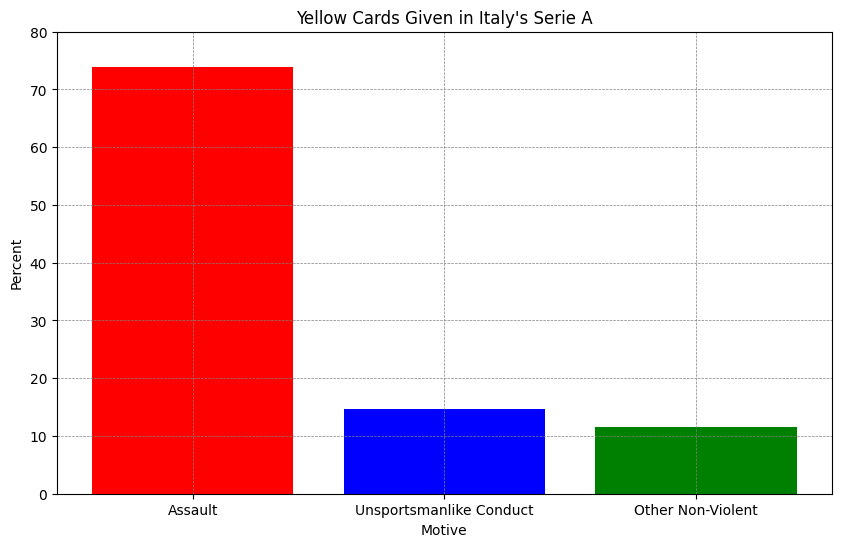

In [ ]:
import matplotlib.pyplot as plt

categories = fig_1_data['cause'][:-1]
percentages = fig_1_data['Percent'][:-1]

colors = ['red', 'blue', 'green']

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# patterns = ['/', '\\', '.']
# for bar, pattern in zip(bars, patterns):
#     bar.set_hatch(pattern)

plt.title("Yellow Cards Given in Italy's Serie A")
plt.xlabel("Motive")
plt.ylabel("Percent")
plt.ylim(0, 80)
plt.grid(color='gray', linestyle='--', linewidth=0.5)


plt.show()

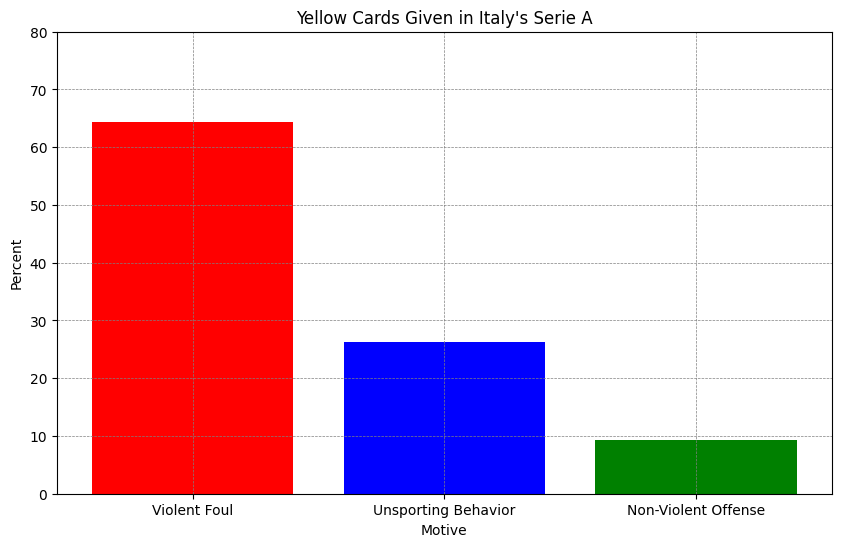

In [ ]:
import matplotlib.pyplot as plt

categories = fig_2_data['cause'][:-1]
percentages = fig_2_data['Percent'][:-1]

colors = ['red', 'blue', 'green']

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors)

# patterns = ['/', '\\', 'o']
# for bar, pattern in zip(bars, patterns):
#     bar.set_hatch(pattern)

plt.title("Yellow Cards Given in Italy's Serie A")
plt.xlabel("Motive")
plt.ylabel("Percent")
plt.ylim(0, 80)
plt.grid(color='gray', linestyle='--', linewidth=0.5)


plt.show()